In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns=None

#### 미국인구 데이터

In [18]:
state_pop_dataset = pd.read_csv('./inputs/state-population.csv')
state_pop_dataset.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


#### 미국 살인기록 데이터

In [5]:
dataset = pd.read_csv('./inputs/murders.csv')
dataset.head()

,state,abb,region,population,total
0,Alabama,AL,South,4779736,135
1,Alaska,AK,West,710231,19
2,Arizona,AZ,West,6392017,232
3,Arkansas,AR,South,2915918,93
4,California,CA,West,37253956,1257


#### 독일 신용 데이터

In [6]:
# German credit data를 살펴보자.
german_dataset = pd.read_csv('./inputs/german_credit_data.csv',  index_col=0)

In [5]:
# 데이터에는 돈을 갚을 능력(Good/Bad)에 대한 데이터가 없다. 
# 따라서 해당 data를 concat 하도록 하겠다.

# Label 만 가지고 온다.
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
dataset = pd.read_csv(path, delimiter=' ', header=None)

# 데이터를 concat
german_dataset = pd.concat([german_dataset, dataset.iloc[:,-1] - 1], axis=1)

# 컬럼 이름 변경
german_dataset.columns.values[-1] = 'Risk'

In [7]:
german_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


#### House price 데이터

In [8]:
housing_data = pd.read_csv('./inputs/housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


---

- 빅데이터 시대가 되면서 더이상 표본추출(표집, 샘플링)이 필요 없을 거라는 오해
- 데이터의 질과 적합성을 일정 수준 이상으로 담보할 수 없으면서 데이터 크기만 늘어나는 것이 오늘날 상황
- 오히려, 다양한 데이터를 효과적으로 다루고 데이터 편향을 최소화하기 위한 방법으로 표본추출의 필요성이 더 커짐

- 전통적인 통계학에서는 강력한 가정에 기초한 이론을 통해 모집단을 밝혀내는 데 초점
- 현대 통계학에서는 이러한 가정이 더 이상 필요하지 않은, 즉 효과적인 표본추출에 대한 연구로 방향이 옮겨지기 시작
- 데이터 과학자들은 이론적 측면에 대해 걱정하기보다, 표본추출 과정과 주어진 데이터에 집중할 필요가 있음. 하지만 이론적인 측면을 알아야 함.

## 1. Random Sampling과 Sample Bias

---

- 표본(sample) : 모집단 또는 큰 데이터 집합으로부터 얻은 부분집합
- 모집단(population) : 어떤 데이터 집합을 구성하는 전체 대상 혹은 전체 집합
- $N$ : 모집단의 크기
- $n$ : 표본의 크기
- 랜덤표본추출(random sampling, 임의표집) : 무작위로 표본을 추출하는 것
- 층화표본추출(stratified sampling) : 모집단을 층으로 나눈 뒤, 각 층에서 무작위로 표본을 추출하는 것
- 단순랜덤표본 : 모집단 층화(stratified) 없이 랜덤표본추출로 얻은 표본
- 표본편향(sample bias) : 모집단을 잘못 대표하는(misrepresents) 표본

---

- 랜덤표본추출(Random sampling, 임의표집)은 무작위로 표본을 추출하는 것, 각 추첨에서 모든 원소는 동일한 확률로 뽑힘.
  - 복원추출(With replacement) : 추출 후, 다음번에도 중복 추출이 가능하도록 해당 샘플을 다시 모집단에 포함
  - 비복원추출(Without replacement) : 한번 뽑힌 원소는 추후 추첨에 사용하지 않음
- 샘플 기반의 추청이나 모델링에서 **데이터 품질은 데이터 양보다 더욱 중요함**
- 데이터 과학에서 <U>데이터 품질</U>
    - 완결성(completeness)
    - 형식의 일관성(consistency of format)
    - 깨끗함(cleanliness)
    - 각 데이터 값의 정확성(accuracy of individual data points)
    - 대표성(representativeness) $\to$ 통계에서 중요시 생각하는 것
- 표본편향(Sample bias)은 모집단을 잘못 대표하는 표본을 의미하며, 유의미한 nonrandom(비임의 방식)으로 표본이 추출될 때 발생. 이 경우 랜덤표본이라고 해도 어떤 표본도 모집단을 정확하게 대표할 수 없다는 것을 의미.
 - 대표적인 예가 review 데이터가 될 수 있다.
 - 대표적인 예가 대선 설문 조사시에, 특정 지역, 특정 계층에 대해서만 표본을 추출하는 경우

### (Sample) Bias
- (통계) Bias : 측정 과정 혹은 표본추출 과정에서 발생하는 systematic 오차를 의미
- (머신러닝) Bias : 모델의 예측값과 실제값의 차이

### Random selection
 - Bias, 즉 표본편향 문제를 피하고, 데이터의 representativeness(대표성)을 담보하기 위한 핵심
 - Random sampling을 위해 고려해야 할 2가지
     - 접근 가능한 모집단의 적절한 정의 
         - ex) 고객의 정의 : 구매 금액이 0보다 큰 고객이 대상일 때, 모든 과거 고객을 포함? 제품을 환불한 고객 포함? 사업자 포함?
     - 표본추출 절차를 선택
         - ex) 고객을 추출 : 무작위로 100명의 고객을 선택? 평일 오전 10시의 방문자들만?(주말 오전 10시의 방문자와 같을까?)
 - <font color=green>Stratified sampling (층화표본추출)</font> : 모집단을 여러 층으로 나누고 각 층(strata)에서 무작위로 샘플을 추출

### Size vs Quality

빅데이터 시대라 할지라도, 데이터 개수가 적을수록 더 유리한 경우도 존재한다. 랜덤표본추출에 시간과 노력을 기울일수록 편향이 줄어들 뿐만 아니라 데이터 탐색 및 데이터 품질에 더 집중할 수 있다. 

Missing value 또는 outlier를 통하여 유용한 정보를 얻을 수 있다. 몇백만 개 데이터 중에서 missing value 및 outlier를 추적하고 평가하는 것은 어렵지만 수천개의 데이터 샘플에서는 가능할 수 있다. 이처럼 데이터가 많은 경우에는 데이터를 일일이 손으로 조사하고 검사하기 매우 어렵다.

그렇다면 대량의 데이터가 필요할 때는 언제일까? 빅데이터가 가치 있을 때는, 데이터가 크고 동시에 sparse 할 때이다. 구글 검색 쿼리를 생각해보자. word - document matrix를 생각할 수 있고, 행렬의 대부분의 entry가 0가 될 것이다. 아주 방대한 데이터가 누적될 때에 대부분에 쿼리에 대해 효과적인 검색 결과를 반환할 수 있게 될 것이다. 정확한 검색 결과는 데이터가 많은 양이 누적되어 있을 때 가능한 것이지, 랜덤표본추출을 잘 한다고 해서 도움이 되는 것이 아니다.

## 2. Sampling Distribution of Statistics

- 용어정리
    - Sample statistic(표본통계량) : 더 큰 모집단에서 추출된 표본(a sample) 데이터들로부터 얻은 측정 지표 (예를 들어, 표본평균)
    - Data distribution(데이터 분포) : 어떤 데이터 집합에서의 각 개별 값의 도수분포
    - Sampling distribution(표본분포) : 여러 표본들(samples) 혹은 재표본(resamples)들로부터 얻은 표본통계량의 도수분포
    - Central limit theorem(중심극한정리) : 표본크기가 커질수록 표본분포가 정규분포를 따르는 경향
    - Standard error(표준오차) : 여러 표본들(samples)로부터 얻은 표본통계량의 변량(개별 데이터 값들의 변량을 뜻하는 표준편차와 다름)

일반적으로 우리는 측정 및 통계 or 머신러닝 모델링을 위해 표본을 추출한다. 표본을 통한 추정이나 모델링은 오류가 있다. 다른 표본을 추출했다면 결과가 다를 수 있다. 과연 결과가 얼마나 달라졌을까에 대한 관심사가 <font color=green>sampling variability(표본의 변동성)</font>이다.

우리가 많은 양의 데이터를 가지고 있다면 추가로 표본을 얻어서 통계의 분포를 직접 관찰할 수 있다. 하지만 보통은 이미 최대한 많은 데이터를 사용하여 추정치 또는 모델을 계산했을 것이므로, 모집단에서 추가 표본을 얻는 옵션은 쉽게 이용할 수 없다. 표본의 변동성을 확인하는 것은 결국 표본통계량의 분포를 살펴보는 것이다. 

대표적인 표본통계량인 표본평균의 분포는, 특히나 표본의 크기가 커질수록, 데이터 자체의 분포보다 규칙적이고 종 모양일 가능성(정규분포일 가능성)이 높다. (물론 중심극한정리를 알기에 받아들이는 사실이지만 직관적으로도 그렇다.)

### Central limit theorem

In [8]:
import matplotlib as mpl
plt.rcParams["figure.figsize"] = (10,20)

캘리포니아 집 값 데이터에 대하여, 집 값의 median에 대한 표본분포를 살펴보자.

C:\Users\isbyeon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Sample mean of 100 data points : 1000 samples')

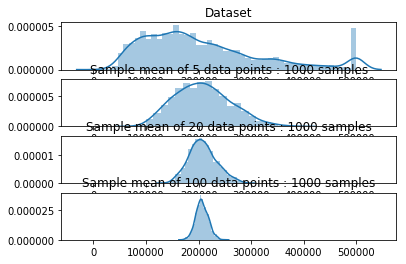

In [10]:
# 1. 전체 표본에 대한 분포
ax1 = plt.subplot(411)
sns.distplot(housing_data['median_house_value'])
plt.title('Dataset')

# 2. 데이터를 5개씩 추출해서 표본을 만들고, 표본평균을 구한다. 즉, 표본의 크기는 5이다. 이 과정을 1000번 반복한다. 
sample_5 = []
for _ in range(1000):
    sample_5.append(housing_data.median_house_value.sample(5).mean())
ax2 = plt.subplot(412, sharex = ax1)
sns.distplot(sample_5)
plt.title('Sample mean of 5 data points : 1000 samples')

# 3. 데이터를 20개씩 추출해서 표본을 만들고, 표본평균을 구한다. 즉, 표본의 크기는 20이다. 이 과정을 1000번 반복한다.
sample_20 = []
for _ in range(1000):
    sample_20.append(housing_data.median_house_value.sample(20).mean())
ax3 = plt.subplot(413, sharex = ax1)
sns.distplot(sample_20)
plt.title('Sample mean of 20 data points : 1000 samples')

# 4. 데이터를 100개씩 추출해서 표본을 만들고, 표본평균을 구한다. 즉, 표본의 크기는 100이다. 이 과정을 1000번 반복한다.
sample_100 = []
for _ in range(1000):
    sample_100.append(housing_data.median_house_value.sample(100).mean())
ax4 = plt.subplot(414, sharex = ax1)
sns.distplot(sample_100)
plt.title('Sample mean of 100 data points : 1000 samples')

중심극한정리는 모집단이 정규분포가 아니더라도, 표본크기가 충분하고 데이터가 정규성을 크게 이탈하지 않는 경우 여러 표본에서 추출한 평균은 종 모양의 정규곡선을 따른다는 것을 보여준다. 중심극한정리 덕분에, 추론을 위한 표본분포에, 즉 신뢰구간이나 가설검정을 계산하는 데에 $t$ 분포 같은 정규근사 공식을 사용할 수 있다.

데이터 과학에서는 형식적인 가설검정이나 신뢰구간이, 통계에서의 중요성만큼, 중요하지 않기 때문에(이 2개의 밑바탕이 바로 중심극한정리이다) 중식극한정리가, 통계에서의 중요성만큼, 중요하지는 않다.

### Standard error

- 표준오차는 표본분포의 변동성을 나타내는 측정 지표
- 표본 값들의 표준편차가 $s$이고 표본크기가 $n$일 때, $\text{Standard error} = \frac{s}{\sqrt{n}}$ 
- 표본크기가 커지면 표준오차가 줄어들며, 표준오차와 표본크기 사이의 관계를 때로는 $n$ 제곱근의 법칙(square root of $n$ rule)이라고 한다. 표준오차를 2배로 줄이려면 표본 크기를 4배 증가시켜야 한다.
- 표준오차를 측정할 때 고려해야 할 사항
    1. 모집단에서 완전히 새로운 샘플들을 많이 수집한다.
    2. 각각의 새 샘플에 대해 통계량(예, 평균)을 계산한다.
    3. 2번째 단계에서 얻은 통계량의 표준편차를 계산한다. 이것을 표준오차의 추정치로 사용한다.

현대 통계에서는 새로운 샘플을 뽑을 필요 없이, **bootstrap(부트스트랩) 재표본**을 사용하여 표준 오차를 추정한다. 현대 통계에서 부트스트랩은 표준 오차를 추정하는 표준 방법이 되었다. <U>사실상 모든 통계에 사용할 수 있으며 중심극한정리 또는 기타 분포 가정에 의존하지 않는다.</U>

## 3. <font color=red>Bootstrap</font>

- 통계량이나 모델 파라미터(모수)의 표본분포를 추정하는 쉽고 효과적인 방법
- 현재 있는 표본에서 추가적으로 표본을 **복원추출**하고 각 표본에 대한 통계량과 모델을 다시 계산하는 것
- 데이터나 표본통계량이 정규분포를 따라야 한다는 가정은 꼭 필요하지 않음
- 표본을 많이 복제하고(수천, 수백만 번) 이를 통해 원래 표본으로부터 얻어지는 모든 정보를 포함하는 가상 모집단을 얻게 된다고 가정할 수 있음

---
- Bootstrap sample(부트스트랩 표본) : 관측 데이터 집합으로부터 얻은 복원추출 표본
- Resampling(재표본추출, 리샘플링) : 관측 데이터로부터 반복해서 표본추출하는 과정이며, bootstrap과 shuffling(순열) 과정을 포함
---

---

(**Bootstrap 알고리즘**)
1. 샘플 값을 하나 뽑아서 기록하고 제자리에 놓는다.
2. $n$ 번 반복한다.(resampling)
3. $n$ 번 재표본추출된(resampled) 값의 평균을 기록한다.
4. 1~3단계를 $R$번 반복한다.
4. $R$개의 결과를 사용하여 (총 $nR$번 추출)
 - 결과들의 표준편차(표본평균의 표준오차)를 계산한다.
 - 히스토그램 또는 상자그림을 그린다.
 - 신뢰구간을 찾는다.
        
---

부트스트랩의 반복 횟수는 임의로 설정한다. 반복 횟수가 많을수록 표준오차나 신뢰구간에 대한 추정이 더 정확해진다. 이런 절차를 통해 표본통계량 혹은 추정한 모델 파라미터의 부트스트랩 집합을 얻게 되고, 결과적으로 이 집합이 얼마나 변하는지를 조사할 수 있다.

---
**(예제) Bootstrap을 이용하여 미국 인구의 median을 추정하라**

In [11]:
# (미국 인구 데이터) median 원래 추정치
print('dataset의 median :', state_pop_dataset.population.median())

dataset의 median : 1597005.0


In [15]:
# (미국 인구 데이터) 부트스트랩 분포
state_pop_sample_meds = []
# 100개의 data가 1개의 sample set이다. 총 500번 반복
for _ in range(500):
    samp_med = state_pop_dataset.population.sample(100, replace=True).median()
    state_pop_sample_meds.append(samp_med)

SyntaxError: invalid syntax (<ipython-input-15-333910e09808>, line 7)

In [12]:
print('bootstrap median :', np.mean(state_pop_sample_meds))
print('bootstrap median의 표준오차(변동성) :', np.std(state_pop_sample_meds))

bootstrap median : 1675731.245
bootstrap median의 표준오차(변동성) : 339939.30553654494


---

- Baggigng : 분류 및 회귀 트리를 사용할 때, 여러 부트스트랩 샘플을 가지고 트리를 여러 개 만든 다음 각 트리에서 나온 예측값을 평균 내는 것
- Bootstrap은 표본크기가 작은 것을 보완하기 위한 것이 아니고, 새로운 데이터를 만들거나 기존 데이터 집합의 빈 곳을 채우는 것도 아니다. <U>모집단에서 추가적으로 표본을 뽑는다고 할 때, 그 표본이 얼마나 원래 표본과 비슷할지를 알려줄 뿐이다.</U> 

다시한번 정리하자면, 부트스트랩(데이터로부터 복원추출하는 기법)은 표본평균 또는 표본 중앙값과 같은 표본통계량의 변동성을 평가하는 강력한 도구이다. 부트스트랩은 수학적 근사치에 대한 엄청난 연구 없이도 다양한 환경에서 유사한 방식으로 적용될 수 있다.

## 4. 신뢰구간

- 신뢰구간은 구간 범위로 추정값을 표시하는 일반적인 방법이며, 우리가 구하고자 하는 관심 통계량을 포함할 것으로 예상되는 구간이다.
- 신뢰구간은 항상 신뢰수준(confidence level)과 함께 나온다.
 - 90% 신뢰구간 : 표본통계량의 부트스트랩 표본분포의 90%를 포함하는 구간
- 표본추정치의 주위의 $x$% 신뢰구간이란, 평균적으로 유사한 표본추정치 $x$% 정도(비슷한 샘플링 절차를 따랐을 때)가 포함되어야 한다.

표본크기 $n$과 관심있는 표본통계량이 주어졌을 때, 부트스트랩 신뢰구간을 구하는 방법
1. 데이터에서 복원추출 방식으로 크기 $n$인 표본을 뽑는다. (a resampling)
2. Resampling 표본에 대해 원하는 통계량을 기록한다.
3. 1 ~ 2 단계를 R번 반복한다.
4. $x$% 신뢰구간을 구하기 위해, R개의 resampling 결과로부터 분포의 양쪽 끝에서 $\frac{(100-x)}{2}$% 만큼 잘라낸다.
5. 절단한 점들은 $x$% 부트스트랩 신뢰구간의 양 끝점이다.

- 부트스트랩은 대부분의 통계량 혹은 모델 파라미터에 대한 신뢰구간을 생성하는 데 사용할 수 있는 일반적이고 효과적인 기법
- 컴퓨터가 없던 시절에는 $t$-분포로 구한 신뢰구간을 사용

신뢰구간과 관련된 백분율을 신뢰수준이라고 부른다. 신뢰수준이 넓을수록 구간이 넓어진다. 또한 표본이 작을수록 구간이 넓어진다. 즉 불확실성이 더 커진다.

---

**(예제) 캘리포니아 지역의 평균 집 값에 대한 90% 신뢰구간을 부트스트랩을 이용하여 구하라.**

In [19]:
# (Housing data)
house_prices = []
for _ in range(1000):
    mean_price = housing_data.median_house_value.sample(50, replace=True).mean()
    house_prices.append(mean_price)

C:\Users\isbyeon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


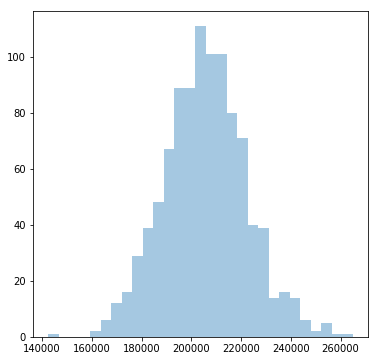

In [20]:
plt.rcParams["figure.figsize"] = (6, 6)
sns.distplot(house_prices, kde=False)

In [15]:
# 90% 구간
ci_min = np.percentile(house_prices, 5)
ci_max = np.percentile(house_prices, 95)

print('90% CI lower:', ci_min)
print('90% CI upper:', ci_max)

90% CI lower: 181674.34
90% CI upper: 235206.799


**(예제) 미국 지역별 살인 발생 횟수의 평균에 대한 90% 신뢰구간을 부트스트랩을 이용하여 구하라.**

---

## 5. 정규분포

- 용어정리
    - Error(오차) : 데이터 포인트와 예측값 혹은 평균 사이의 거리
    - Standardize(표준화/정규화하다) : 평균을 빼고 표준편차로 나눈다.
    - Z-score(z 점수) : 개별 데이터 포인트를 정규화한 결과
    - Standard normal distribution : 평균=0, 표준편차=1인 정규분포
    - QQ plot(QQ 그림) : 표본분포가 정규분포에 얼마나 가까운지를 보여주는 그림

- 대부분의 데이터가 정규분포를 따르기 때문에, 즉 이게 정상이기 때문에 정상적인(normal) 분포라고 부르는 것은 아니다. 실제로 전형적인 데이터 과학 프로젝트에서 사용되는 대부분의 변수들, 실제 대부분의 원시 데이터는 전체적으로 정규분포를 따르지 않는다. 표본분포에서 대부분의 통계량이 정규분포를 따른다는 점에서 정규분포의 유용함이 드러날 뿐이다. 설령 그렇다 해도 일반적으로 정규분포 가정은 경험적 확률분포나 부트스트랩 분포를 구할 수 없는 경우 사용되는 최후의 수단이다.

표준정규분포는 $x$축의 단위가 평균의 표준편차로 표현되는 정규분포를 말한다. 데이터를 표준정규분포와 비교하려면 데이터에서 평균을 뺀 다음 표준편차로 나누면 된다. 이를 정규화(normalization) 또는 표준화(standardization)라고 한다. 이렇게 변환된 값을 $z$점수라고 하며, 정규분포를 $z$분포라고도 한다.

데이터를 $z$점수로 변환(즉, 데이터를 표준화 또는 정규화)한다고 해서, 데이터가 정규분포가 되는 것은 아니다. 단지 비교를 목적으로 데이터를 표준정규분포와 같은 척도로 만드는 것이다.

QQ 그림은 표본이 정규분포에 얼마나 가까운지를 시각적으로 판별하는 데 사용된다. QQ 그림은 $z$점수를 오름차순으로 정렬하고 각 값의 $z$ 점수를 $y$축에 표시한다. $x$축은 정규분포에서의 해당 분위수를 나타낸다. 데이터가 표준화되었기 때문에, 단위는 평균으로부터 떨어진 데이터의 표준편차 수에 해당한다. 점들이 대략 대각선 위에 놓이면 표본분포가 정규분포에 가까운 것으로 간주할 수 있다.

QQ plot을 그리기 위해서는 `scipy.stats`의 `probplot`을 사용한다. 다른 라이브러리를 이용해서 그릴수도 있다.

Text(0.5, 1.0, 'Normal distribution')

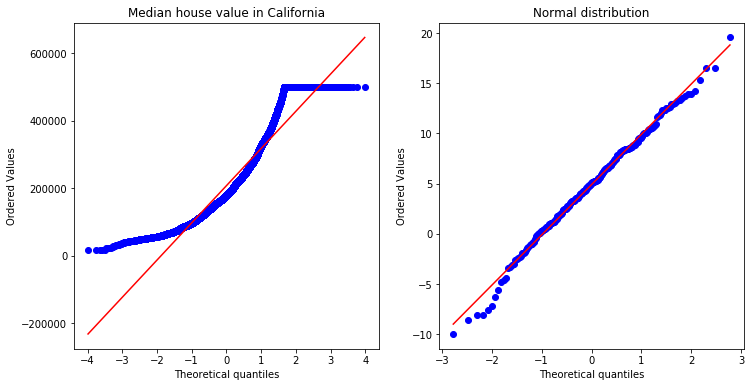

In [28]:
# (Housing data)
from scipy import stats

plt.rcParams["figure.figsize"] = (12, 6)

# Housing data
plt.subplot(121)
stats.probplot(housing_data.median_house_value, plot=sns.mpl.pyplot)
plt.title('Median house value in California')

# Synthetic normal distribution data
plt.subplot(122)
stats.probplot(np.random.normal(5,5,250), plot=sns.mpl.pyplot)
plt.title('Normal distribution')

## 6. 긴 꼬리 분포

---
- Tail(꼬리) : 적은 수의 극단값이 주로 존재하는, 도수분포의 길고 좁은 부분
- Skewness : 분포의 한쪽 꼬리가 반대쪽 다른 꼬리보다 긴 정도

---

- 오차나 표본통계량의 분포를 볼 때 정규분포는 적절하고 유용하지만, 정규분포가 일반적으로 원시 데이터 분포의 특징을 나타내지는 않는다.
- <font color=red>실무에서는 long tail 분포를 잘 들여다보는 것이 중요하다.</font>
- 데이터는 가변적이며 보기에는 하나가 아닌 여러 유형의 분포와 일치할 수 있다.
- 일반적으로 주어진 상황을 묘사하기에 적합한 분포 유형을 결정하기 위해서, 데이터만 들여다 보는것이 아니라, 분야 지식과 통계 지식을 모두 활용해야 한다.
    - 예) 5초마다 연속적으로 서버의 인터넷 트래픽 수준에 대한 데이터를 얻는다고 할 때 적합한 분포 유형은? '시간 주기별 이벤트'를 모델링하는 데 가장 적합한 분포가 포아송 분포라는 사전 지식이 있다면 큰 도움이 된다.

Text(0.5,1,'Total room number in California')

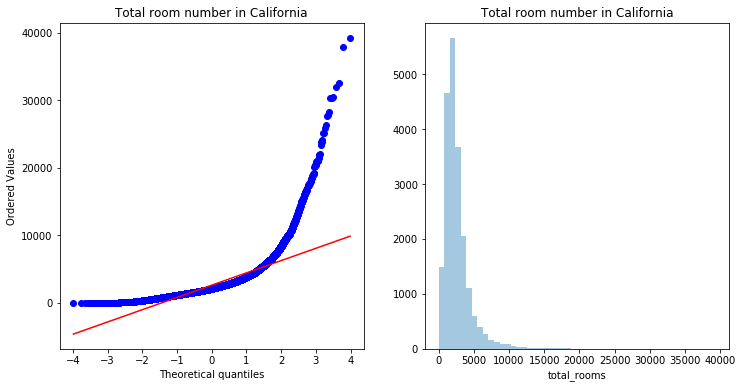

In [17]:
# (Housing dataset) 긴꼬리 분포와 그것의 QQ 그림을 비교
plt.subplot(121)
stats.probplot(housing_data.total_rooms, plot=sns.mpl.pyplot)
plt.title('Total room number in California')

plt.subplot(122)
sns.distplot(housing_data.total_rooms, kde=False)
plt.title('Total room number in California')

예제에서 왼쪽 그래프를 보면, 높은 값은 직선보다 훨씬 위에 위치하기 때문에, 이것은 데이터가 정규분포를 따른다고 할 때 예상되는 것보다 훨씬 더 많은 극단값을 관찰할 가능성이 있다.

## 7. 스튜던트의 $t$분포

---
- $n$ : 표본 크기
- Degrees of freedom(자유도) : 다른 표본크기, 통계량, 그룹의 수에 따라 $t$분포를 조절하는 변수
---

- $t$분포는 정규분포와 생김새가 비슷하지만, 꼬리 부분이 약간 더 두껍고 길기 때문에, 표본통계량의 분포를 설명하는 데 광범위하게 사용된다.
- <U>표본평균의 분포는 일반적으로 $t$분포와 같은 형태이며 표본이 클수록 더욱 정규분포를 닮은 $t$분포가 형성된다.</U>
- 표준화된 여러 통계 자료를 $t$분포와 비교하여 신뢰구간을 추정할 수 있다.
- 표본평균이 $x$인, 크기 $n$의 표본이 있다고 가정할 때, $s$가 표본 표준편차라면, 표본평균 주위의 90% 신뢰구간은 [$\bar{x}-t_{n-1}(.05)\times \frac{s}{\sqrt{n}}$, $\bar{x}+t_{n-1}(.05)\times \frac{s}{\sqrt{n}}$]
- 사실, 지금과 같은 성능의 컴퓨터가 1908년($t$분포 논문이 나왔던 시기)부터 널리 보급됐다면, 처음부터 통계학은 계산을 많이 필요로 하는 resampling 방법을 더 많이 이용했을 것이다. 컴퓨터가 없었던 시절, 통계학자들은 표본분포를 근사화하기 위한 수학적 기법과 $t$분포와 같은 함수로 눈을 돌렸다.
- 표본평균, 두 표본평균 간의 차이, 회귀 파라미터, 그 외 다른 통계량들의 분포를 구할 때 $t$ 분포를 사용한다.
- 표본통계량의 상태를 묘사할 때 $t$ 분포의 정확도는 표본에 대한 통계량의 분포가 정규분포를 따른다는 조건을 필요로 한다. 모집단이 정규분포를 따르지 않을 때조차도, 표본통계량은 보통 정규분포를 따르는 것으로 나타났다. ($t$ 분포가 널리 적용되는 이유이며 이런 현상을 *중심극한정리*라고 부른다.)

---

데이터 과학자가 $t$분포와 중심극한정리에 대해 알아야 할 것은 무엇일까? 사실, 별로 없다. 이러한 분포는 고전적인 통계적 추론에 사용되기는 하지만, 데이터 과학이 주로 추구하는 목적과는 조금 거리가 있다. 데이터 과학자에게는 불확실성과 변동성을 이해하고 정량화하는 것이 중요하다. 이러한 목적을 위해서라면, 경험적 부트스트랩 표본추출을 통해서도 표본 오차에 대한 대부분의 질문에 답을 얻을 수 있다. 하지만 데이터 과학자들은 회귀분석 같은 통계 절차를 통해 나온 $t$통계량을 자주 만나게 되니 알아두면 도움이 된다.

---

## 8. 이항분포
---
- Trial(시행) : 독립된 결과를 가져오는 하나의 사건(동전 던지기)
- Success(성공) : 시행에 대한 관심의 결과(1, 즉 0의 반대)
- Binomial(이항식) : 2가지 결과를 갖는다.(이진, Y/N, 0/1)
- Binomial trial(이항시행) : 2가지 결과를 가져오는 시행(베르루이 시행)
- Binomial distribution(이항분포) : 각 시행마다 성공확률 $p$가 정해져 있을 때, $x$번 시행에서 성공한 횟수에 대한 분포
---

이항분포란 각 시행마다 그 성공 확률($p$)가 정해져 있을 때, 주어진 시행 횟수($n$) 중에서 성공한 횟수($x$)의 도수분포를 의미한다.

한 번의 클릭이 판매로 이어질 확률이 0.1일 때, 5회 클릭으로 2번 판매될 확률을 구해보자.

In [18]:
stats.binom.pmf(2, 5, 0.1)

0.0729

한 번의 클릭이 판매로 이어질 확률이 0.1일 때, 5회 클릭으로 2번 이하로 판매될 확률을 구해보자.

In [19]:
stats.binom.cdf(2, 5, 0.1)

0.99144

- 시행 횟수가 충분할 경우(특히 p가 0.5에 가까울 때) 이항분포는 사실상 정규분포와 구별이 어렵다.
- 실제로 표본크기가 커질수록 이항 확률을 구하기 위해선 많은 계산이 필요하다 보니, 대부분의 통계 절차에서는 평균과 분산으로 근사화한 정규분포를 사용한다.

## 9. 포아송 분포와 그 외 관련 분포들

---
- Lambda : 단위 시간이나 단위 면적당 사건이 발생하는 비율(평균적인 사건의 수)
- Poisson distribution : 단위 시간 혹은 단위 공간에서 발생한 사건의 도수분포
- Exponential distribution : 한 사건에서 그 다음 사건까지의 시간이나 거리에 대한 도수분포
- Weibull distribution : 사건 발생률이 시간에 따라 변화하는, 지수분포의 일반화된 버전
---

### 9.1. 포아송 분포

- 포아송 분포는 시간 단위 또는 공간 단위로 표본들을 수집할 때, 그 사건들의 분포를 알려준다.

- 포아송 분포를 사용할 수 있는 다양한 예
    - 일정한 시간동안 웹사이트에 방문한 방문객 수
    - 일정한 시간동안 톨게이트에 들어오는 자동차
    - 1제곱미터당 건물의 결함
    - 코드 100줄당 오타

- 포아송 분포의 핵심 파라미터 $\lambda$ : 일정 시간 / 공간 구간 안에서 발생한 평균 사건 수. 포아송 분포의 분산 역시 $\lambda$

### 9.2. 지수분포

- 포아송 분포에 사용된 것과 동일한 변수 $\lambda$를 사용하여 사건과 사건 간의 시간 분포를 모델링

- 지수분포를 사용할 수 있는 다양한 예
    - 웹사이트 방문이 일어나는 시간 사이
    - 톨게이트에 자동차가 도착하는 시간 사이
    - 기계에서 고장이 발생하는 시간
    - 프로세스 관리에서 개별 고객 상담에 소요되는 시간

포아송이나 지수분포의 핵심은 $\lambda$가 해당 기간 동안 일정하게 유지된다는 가정이다. 시간 주기 또는 공간을 일정 기간 충분히 동일하도록(homogeneous) 영역을 잘 나눈다면, 해당 기간 내의 분석 및 시뮬레이션이 가능하다.

---

(Advanced)

### 9.3. 베이불 분포 (Weibull distribution)

- 사건 발생률이 시간에 지속적으로 변할 때(예를 들어 증가하는 고장률) 베이불 분포를 사용
- Shape parameter $\beta$에 따라 발생률이 달라짐
    - $\beta > 1$일 경우, 발생률은 시간이 자남에 따라 증가
    - $\beta < 1$일 경우, 발생률은 시간이 지남에 따라 감소
- Scale parameter $\eta$은 특수 수명을 표현

---

### References
 - 수리통계학(송성주, 전명식)
 - 데이터 과학을 위한 통계, 데이터 분석에서 머신러닝까지 50가지 핵심 개념
 - The elements of statistical learning
 - An Introduction to Statistical Learning (https://www-bcf.usc.edu/~gareth/ISL/)